<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkST0151ENSkillsNetwork20531532-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>



#### Import the required libraries we need for the lab.


In [141]:
import piplite
await piplite.install(['numpy'],['pandas'])
await piplite.install(['seaborn'])

In [142]:
import pandas as pd
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as pyplot
import scipy.stats
import statsmodels.api as sm
from statsmodels.formula.api import ols

#### Read the dataset in the csv file from the URL


In [143]:
from js import fetch
import io

URL = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
resp = await fetch(URL)
boston_url = io.BytesIO((await resp.arrayBuffer()).to_py())

In [144]:
boston_df=pd.read_csv(boston_url)

In [145]:
boston_df.head()

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0
1,1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6
2,2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7
3,3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4
4,4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2


#### Add your code below following the instructions given in the course to complete the peer graded assignment


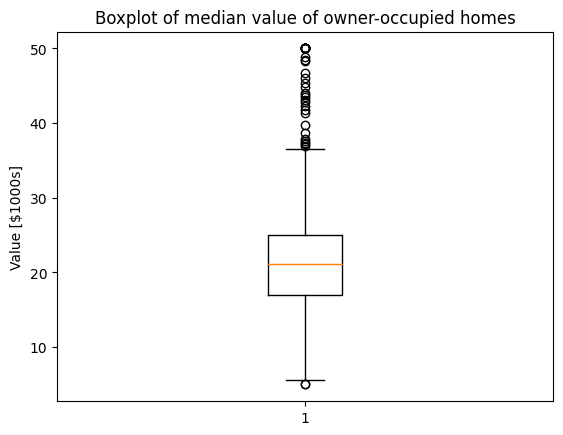

Boxplot shows "Median value of owner-occupied homes". Median value is around 21000$. In addition spread and outliers are visualized.


In [146]:

#Boxplot for only "Median value of owner-occupied homes"

ax = pyplot.boxplot(x='MEDV', data=boston_df)
#pyplot.xlabel('Gender')
pyplot.ylabel('Value [$1000s]')
pyplot.title('Boxplot of median value of owner-occupied homes')
pyplot.show()

print('Boxplot shows "Median value of owner-occupied homes". Median value is around 21000$. In addition spread and outliers are visualized.')



Bar plot shows shares of houses bounded or not bounded by the Charles river


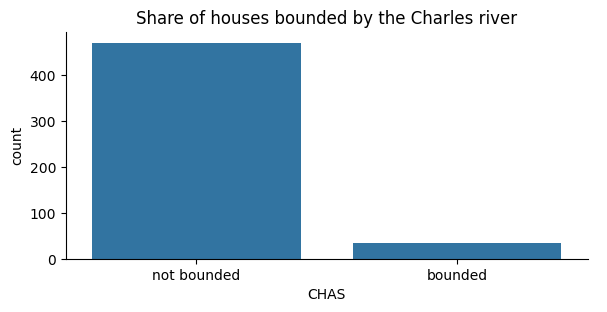

In [147]:
#Provide a  bar plot for the Charles river variable
ax=sns.catplot(x='CHAS', kind='count', data=boston_df,
            height = 3, aspect = 2)
pyplot.title('Share of houses bounded by the Charles river')
ax.set_xticklabels(['not bounded','bounded'])

print('Bar plot shows shares of houses bounded or not bounded by the Charles river')

In [148]:
# Is there a significant difference in median value of houses bounded by the Charles river or not? (T-test for independent samples)

print('H0: There is no significant difference in median value of houses bounded by the Charles river or not')
print('H1: There is a significant difference in median value of houses bounded by the Charles river or not')
print('\n')
MEDV_no_river=boston_df['MEDV'][boston_df['CHAS']==0]
MEDV_river=boston_df['MEDV'][boston_df['CHAS']==1]

print(MEDV_no_river.mean())
print(MEDV_river.mean())

sm.stats.ttest_ind(MEDV_river, MEDV_no_river)



H0: There is no significant difference in median value of houses bounded by the Charles river or not
H1: There is a significant difference in median value of houses bounded by the Charles river or not


22.093842887473464
28.439999999999998


(3.9964374660905015, 7.390623170520132e-05, 504.0)

In [149]:
print('Since p-value=7.39e-05 << 0.05, there is enough evidence to reject the null-hypothesis that there is no significant difference in median value of houses bounded by the Charles river or not. Looking at the t-test and the mean values, house bounded to the river seem to be more expensive.')
print('So, yes there seems to be a significant difference in the median value of houses bounded by the Charles river or not')      

Since p-value=7.39e-05 << 0.05, there is enough evidence to reject the null-hypothesis that there is no significant difference in median value of houses bounded by the Charles river or not. Looking at the t-test and the mean values, house bounded to the river seem to be more expensive.
So, yes there seems to be a significant difference in the median value of houses bounded by the Charles river or not


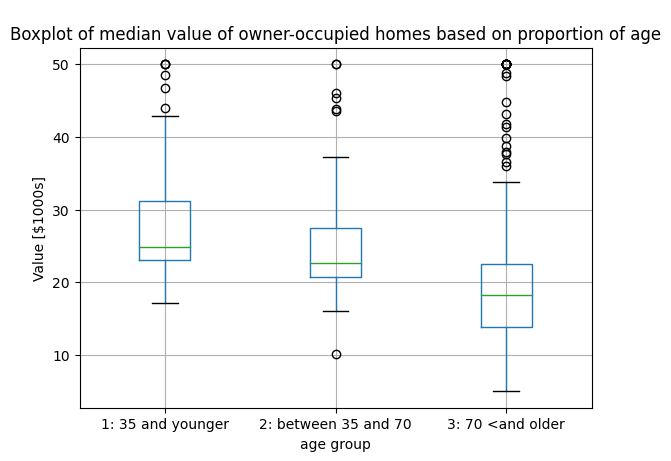

Boxplot shows median value of owner-occupied homes based on proportion of age inkl. median, spread and outliers.


In [150]:
#Provide a boxplot for the MEDV variable vs the AGE variable. (Discretize the age variable into three groups of 35 years and younger, between 35 and 70 years and 70 years and older)

boston_df.loc[(boston_df['AGE'] <= 35), 'age_group'] = '1: 35 and younger'
boston_df.loc[(boston_df['AGE'] > 35)&(boston_df['AGE'] < 70), 'age_group'] = '2: between 35 and 70'
boston_df.loc[(boston_df['AGE'] >= 70), 'age_group'] = '3: 70 <and older'

#print(boston_df.head())
boston_df.boxplot(column='MEDV', by='age_group')
pyplot.title('Boxplot of median value of owner-occupied homes based on proportion of age')
pyplot.suptitle(' ') # Suppress the default suptitle generated by 'by'
pyplot.xlabel('age group')
pyplot.ylabel('Value [$1000s]')
pyplot.show()

print('Boxplot shows median value of owner-occupied homes based on proportion of age inkl. median, spread and outliers.')



In [151]:
# Is there a difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE)? (ANOVA)

print('H0: There is no significant difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE)')
print('H1: There is a significant difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE)')

from statsmodels.formula.api import ols
lm = ols('MEDV ~ age_group', data = boston_df).fit()
table= sm.stats.anova_lm(lm)
print(table)
print('\n')
print('The boxplot already indicates that there is a difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE).')
print('Looking at the p-value of the ANOVA test (p=1.710501e-15 << 0.05) proves that, there is enough evidence to reject the null-hypothesis that there is no significant difference. Hence, there is a enough evidence to assume that the Median values of the houses depends on AGE')
print('So yes, there is a difference in median values of houses of each proportion of owner-occupied units built before 1940?')



H0: There is no significant difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE)
H1: There is a significant difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE)
              df        sum_sq      mean_sq         F        PR(>F)
age_group    2.0   5401.731883  2700.865942  36.40765  1.710501e-15
Residual   503.0  37314.563532    74.184023       NaN           NaN


The boxplot already indicates that there is a difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE).
Looking at the p-value of the ANOVA test (p=1.710501e-15 << 0.05) proves that, there is enough evidence to reject the null-hypothesis that there is no significant difference. Hence, there is a enough evidence to assume that the Median values of the houses depends on AGE
So yes, there is a difference in median values of houses of each proportion 

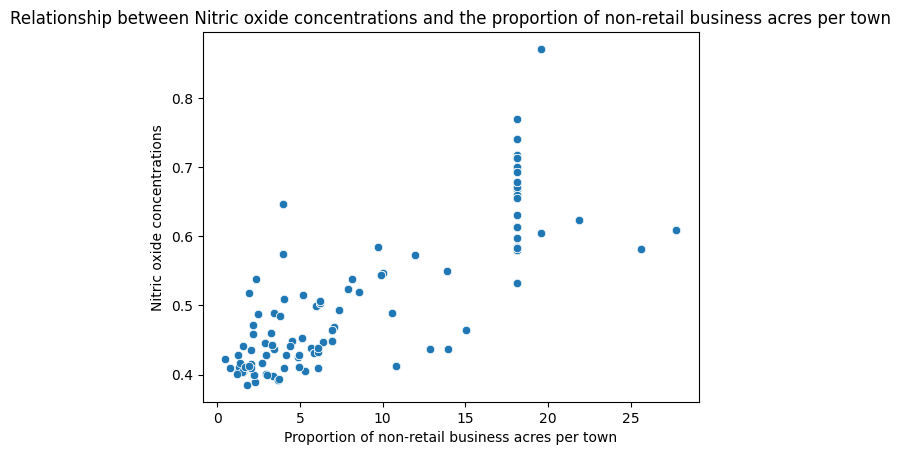

Scatter plot shows Relationship between Nitric oxide concentrations and the proportion of non-retail business acres per town.


In [152]:
#Provide a scatter plot to show the relationship between Nitric oxide concentrations and the proportion of non-retail business acres per town. What can you say about the relationship?
ax = sns.scatterplot(y='NOX', x='INDUS', data=boston_df)

pyplot.ylabel('Nitric oxide concentrations')
pyplot.xlabel('Proportion of non-retail business acres per town')
pyplot.title('Relationship between Nitric oxide concentrations and the proportion of non-retail business acres per town')
pyplot.show()

print('Scatter plot shows Relationship between Nitric oxide concentrations and the proportion of non-retail business acres per town.')

In [153]:
# Can we conclude that there is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town? (Pearson Correlation)

print('H0: There is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town')
print('H1: There is a relationship between Nitric oxide concentrations and proportion of non-retail business acres per town')

correlation_coefficient, p_value = scipy.stats.pearsonr(boston_df['INDUS'], boston_df['NOX'])
print('\n')
print(correlation_coefficient, p_value)
print('\n')
print('The scatterplot already indicates that there is a relation between Nitric oxide concentrations and proportion of non-retail business acres per town.')
print('Looking at the p-value and correlation coefficient of the Pearson Correlation shows, that there is enough evidence to reject H0 since p=7.913e-98 << 0.05. As a consequence we can assume that there is a relationship between Nitric oxide concentrations and proportion of non-retail business acres per town')
print('So yes, we cannot conclude that there is no relationship between Nitric oxide concentrations and the proportion of non-retail business acres per town')

H0: There is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town
H1: There is a relationship between Nitric oxide concentrations and proportion of non-retail business acres per town


0.7636514469209192 7.913361061210442e-98


The scatterplot already indicates that there is a relation between Nitric oxide concentrations and proportion of non-retail business acres per town.
Looking at the p-value and correlation coefficient of the Pearson Correlation shows, that there is enough evidence to reject H0 since p=7.913e-98 << 0.05. As a consequence we can assume that there is a relationship between Nitric oxide concentrations and proportion of non-retail business acres per town
So yes, we cannot conclude that there is no relationship between Nitric oxide concentrations and the proportion of non-retail business acres per town


Not sure why this plot was requested, but I plotted it anyway!
Histogram shows the pupil to teacher ratios per city


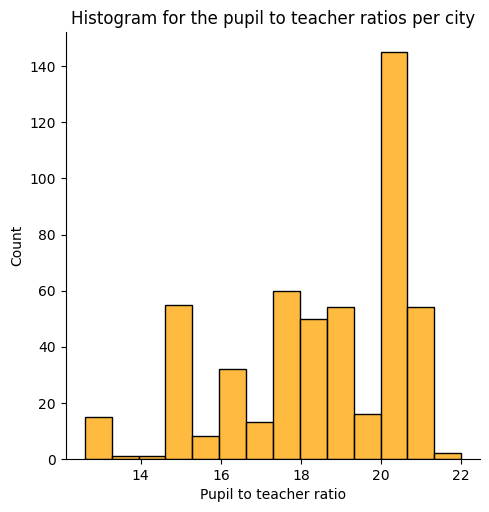

In [154]:
#Create a histogram for the pupil to teacher ratio variable

sns.displot(boston_df['PTRATIO'], color='orange') 

pyplot.xlabel('Pupil to teacher ratio')
pyplot.title('Histogram for the pupil to teacher ratios per city')

print('Not sure why this plot was requested, but I plotted it anyway!')
print('Histogram shows the pupil to teacher ratios per city')


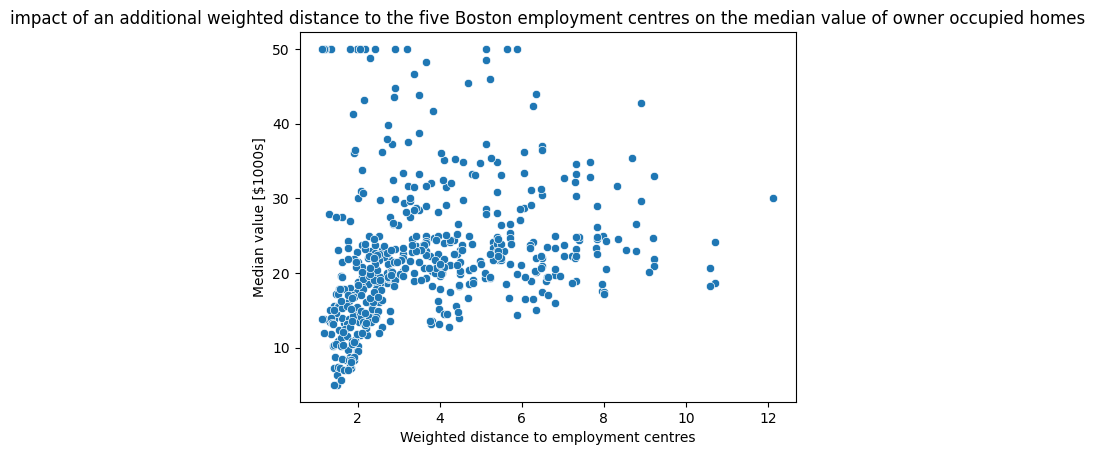

Scatter plot shows relationship between additional weighted distance to the five Boston employment centres on the median value of owner occupied homes


In [155]:
# What is the impact of an additional weighted distance to the five Boston employment centres on the median value of owner occupied homes? (Regression analysis)

ax = sns.scatterplot(y='MEDV',x='DIS', data=boston_df)

pyplot.ylabel('Median value [$1000s]')
pyplot.xlabel('Weighted distance to employment centres')
pyplot.title('impact of an additional weighted distance to the five Boston employment centres on the median value of owner occupied homes')
pyplot.show()

print('Scatter plot shows relationship between additional weighted distance to the five Boston employment centres on the median value of owner occupied homes')

In [156]:

print('H0: There is no impact of an additional weighted distance to the five Boston employment centres on the median value of owner occupied homes')
print('H1: There is an impact of an additional weighted distance to the five Boston employment centres on the median value of owner occupied homes')

X=boston_df['DIS']
y=boston_df['MEDV']

## add an intercept (beta_0) to our model
X = sm.add_constant(X) 
model = sm.OLS(y, X).fit()
#Get fitted values or predict other values based on the model
predictions = model.predict(X)
# Print out the statistics
model.summary()

H0: There is no impact of an additional weighted distance to the five Boston employment centres on the median value of owner occupied homes
H1: There is an impact of an additional weighted distance to the five Boston employment centres on the median value of owner occupied homes


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Fri, 03 Oct 2025   Prob (F-statistic):           1.21e-08
Time:                        13:42:21   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.3901      0.817     22.499      0.000      16.784      19.996
DIS            1.0916      0.188      5.795      0.000       0.722       1.462
==============================================================================
Omnibus:                      139.779   Durbin-Watson:                   0.570
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              305.104
Skew:                           1.466   Prob(JB):                     5.59e-67
Kurtosis:                       5.424   Cond. No.                         9.32
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [157]:
print('\n')
print('The scatterplot indicates that there is a counter-intuitive impact of an additional weighted distance to the five Boston employment centres on the median value of owner occupied homes')
print('Looking at the p-value of the regression analysis shows, that there is enough evidence to reject H0 since p= << 0.05. As a consequence we can assume that there is an impact of an additional weighted distance to the five Boston employment centres on the median value of owner occupied homes')
print('So there is an impact of an additional weighted distance to the five Boston employment centres on the median value of owner-occupied homes. It seems to be counter-intuitive. An increase in the weighted distance to the five Boston employment centers seem s to have a positive correlation with the median value of owner-occupied homes.')



The scatterplot indicates that there is a counter-intuitive impact of an additional weighted distance to the five Boston employment centres on the median value of owner occupied homes
Looking at the p-value of the regression analysis shows, that there is enough evidence to reject H0 since p= << 0.05. As a consequence we can assume that there is an impact of an additional weighted distance to the five Boston employment centres on the median value of owner occupied homes
So there is an impact of an additional weighted distance to the five Boston employment centres on the median value of owner-occupied homes. It seems to be counter-intuitive. An increase in the weighted distance to the five Boston employment centers seem s to have a positive correlation with the median value of owner-occupied homes.
